In [2]:
import pprint
import time

import zmq
from sympy.physics.units import current

ctx = zmq.Context()
# The REQ talks to Pupil remote and receives the session unique IPC SUB PORT
socket = ctx.socket(zmq.REQ)

ip = 'localhost'
port = 50020

socket.connect(f'tcp://{ip}:{port}')

# Request 'SUB_PORT' for reading data
socket.send_string('SUB_PORT')
sub_port = socket.recv_string()

# Request 'PUB_PORT' for writing data
socket.send_string('PUB_PORT')
pub_port = socket.recv_string()

socket.close()

In [3]:
def create_socket(ctx_c, ip_c, topics):
    sub = ctx_c.socket(zmq.SUB)
    sub.connect(f'tcp://{ip_c}:{sub_port}')
    for topic in topics:
        sub.subscribe(topic)
    return sub

In [15]:
import msgpack
import pprint

gaze_socket = create_socket(ctx, ip, ['gaze.'])

gaze_data = []

for i in range(600):
    topic, payload = gaze_socket.recv_multipart()
    message = msgpack.loads(payload)
    gaze_data.append(message)

pprint.pprint(gaze_data[2])

{'base_data': [{'confidence': 0.8753694985571698,
                'diameter': 27.058547973632812,
                'ellipse': {'angle': 117.09475708007811,
                            'axes': [24.97332191467285, 27.058547973632812],
                            'center': [67.1755599975586, 102.01399993896484]},
                'id': 0,
                'method': '2d c++',
                'norm_pos': [0.3498727083206177, 0.46867708365122474],
                'timestamp': 19147.01209,
                'topic': 'pupil.0.2d'},
               {'confidence': 1.0,
                'diameter': 29.350862503051758,
                'ellipse': {'angle': 21.929246902465817,
                            'axes': [23.613208770751953, 29.350862503051758],
                            'center': [74.66655731201172, 55.32428741455078]},
                'id': 1,
                'method': '2d c++',
                'norm_pos': [0.38888831933339435, 0.7118526697158813],
                'timestamp': 19147.008858,
   

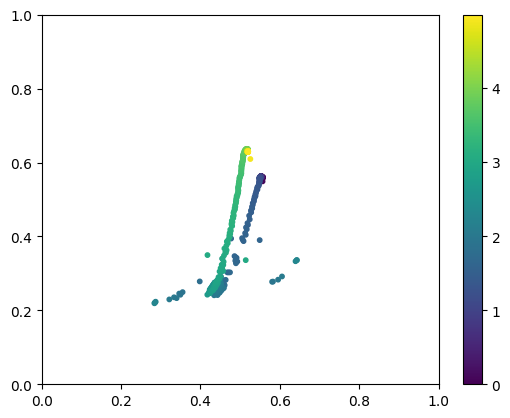

In [16]:
import matplotlib.pyplot as plt
import numpy as np

gaze_norm_pos = np.array([data['norm_pos'] for data in gaze_data])

# use colormap to show the order of the gaze points
plt.scatter(gaze_norm_pos[:, 0], gaze_norm_pos[:, 1], s=10, c=np.arange(len(gaze_norm_pos))/120, cmap='viridis')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.colorbar()
plt.show()

Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2
Error: base_data length is not 2


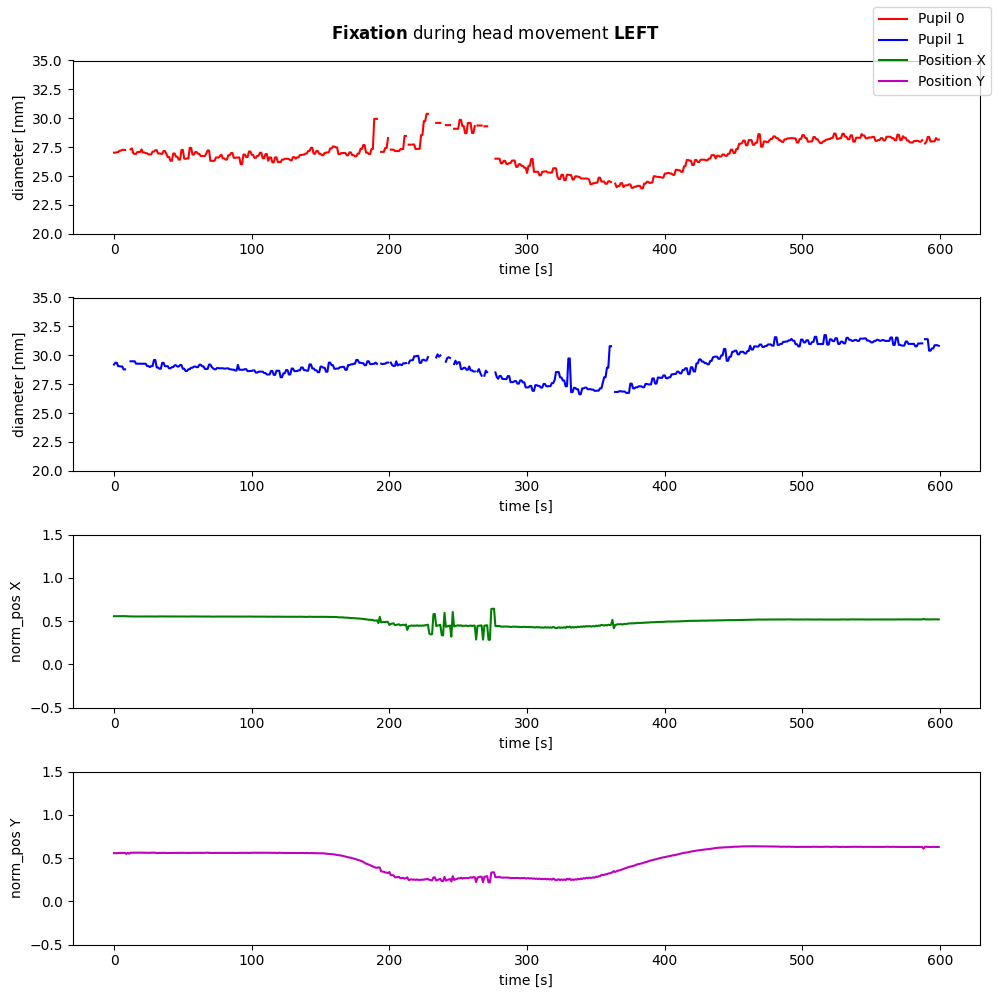

In [17]:
pupil_0_diameter, pupil_1_diameter = [], []
for data in gaze_data:
    base_data = data['base_data']
    if len(base_data) == 2:
        if base_data[0]['id'] == 0:
            pupil_0_diameter.append(base_data[0]['diameter'])
            pupil_1_diameter.append(base_data[1]['diameter'])
        else:
            pupil_0_diameter.append(base_data[1]['diameter'])
            pupil_1_diameter.append(base_data[0]['diameter'])
    else:
        print('Error: base_data length is not 2')
        pupil_0_diameter.append(np.nan)
        pupil_1_diameter.append(np.nan)

# create a fig with 4 subplots below each other and size 10x5
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# plot the pupil diameters
axs[0].plot(pupil_0_diameter, label='Pupil 0', color='r')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('diameter [mm]')
axs[0].set_ylim(20, 35)

axs[1].plot(pupil_1_diameter, label='Pupil 1', color='b')
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('diameter [mm]')
axs[1].set_ylim(20, 35)

axs[2].plot(gaze_norm_pos[:, 0], label='Position X', color='g')
axs[2].set_xlabel('time [s]')
axs[2].set_ylabel('norm_pos X')
axs[2].set_ylim(-0.5, 1.5)

axs[3].plot(gaze_norm_pos[:, 1], label='Position Y', color='m')
axs[3].set_xlabel('time [s]')
axs[3].set_ylabel('norm_pos Y')
axs[3].set_ylim(-0.5, 1.5)

# set the title for the figure
fig.suptitle('$\mathbf{Fixation}$ during head movement $\mathbf{LEFT}$')

# add a legend to the figure
fig.legend()

# adjust the layout of the figure
fig.tight_layout()

# show the figure
plt.show()
fig.savefig('../.local/plots/head_movement/fixation_during_head_movement_left.png')
